In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model 
import cv2 

2024-12-11 22:42:39.448543: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 22:42:39.907813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733935360.084664   10161 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733935360.136049   10161 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 22:42:40.534386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
def display_image(img_set,title_set='',row=1,col=1):
    n=len(img_set)
    plt.figure(figsize=(20,20))
    for i in range(n):
        plt.subplot(row,col,i+1)
        if(title_set!=''):
            plt.title(title_set[i])
        if(len(img_set[i].shape)==2):
            plt.imshow(img_set[i],cmap='gray')
        else:
            plt.imshow(img_set[i])
        plt.axis('off')
    plt.show()
    plt.close()


(4096, 3072, 3)
(4096, 3072)


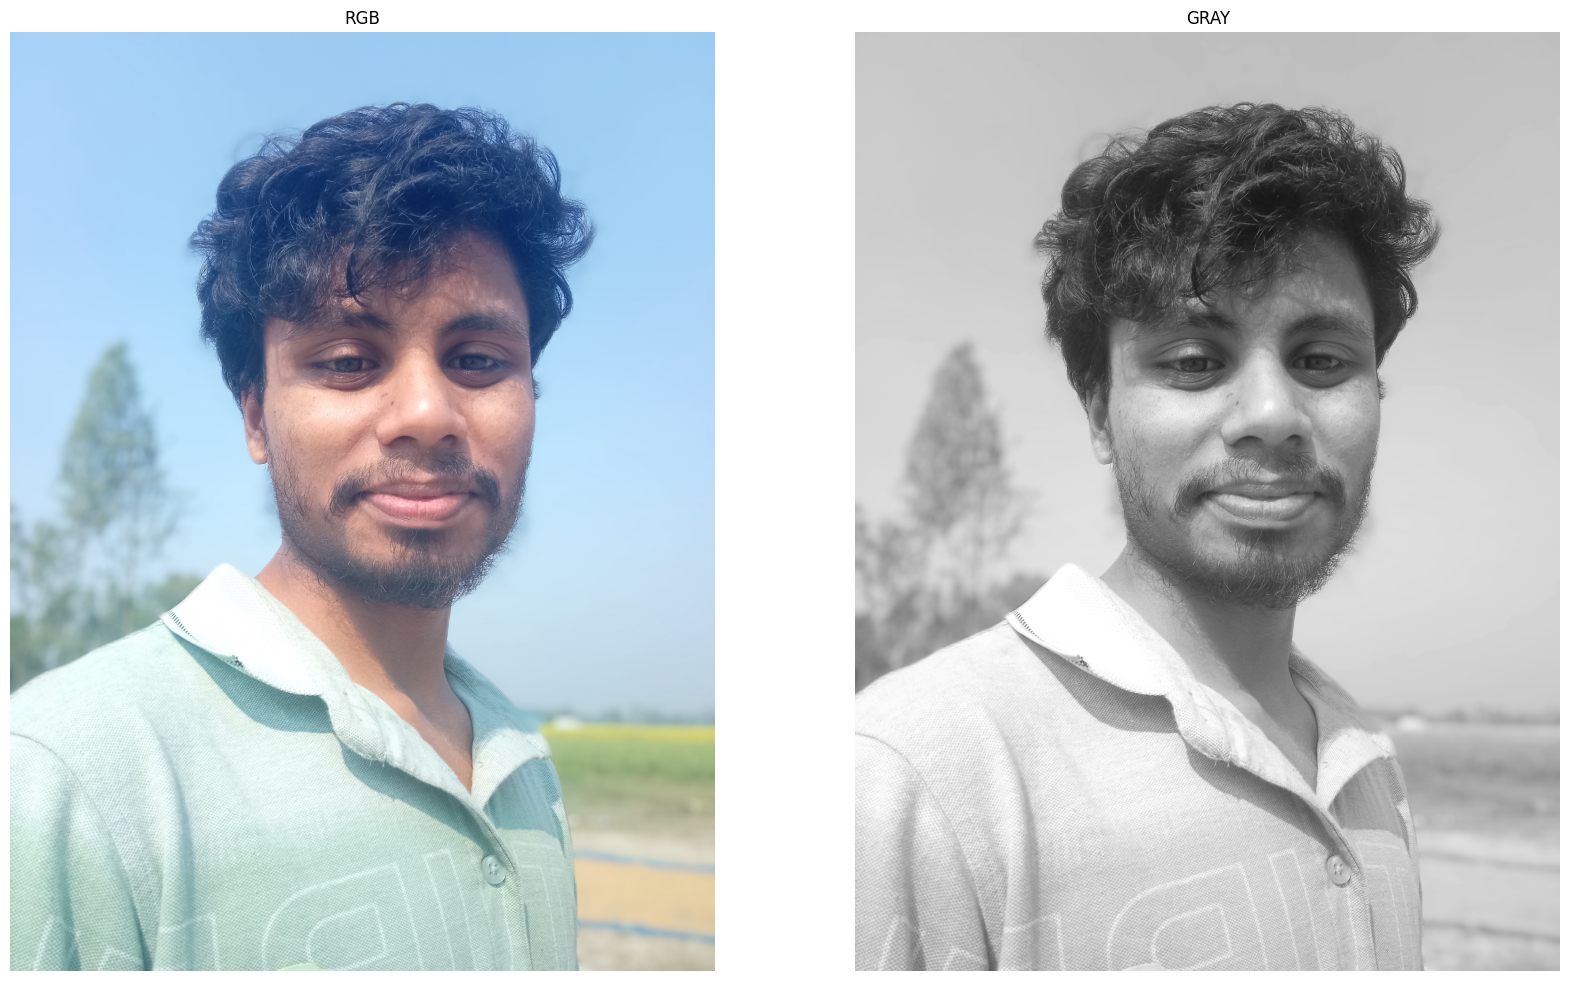

In [4]:
img_path='content/miju.jpg'

rgb_img=plt.imread(img_path)
print(rgb_img.shape)

gray_img=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)
print(gray_img.shape)

img_set=[rgb_img,gray_img]
title_set=['RGB','GRAY']
display_image(img_set,title_set,row=1,col=2)

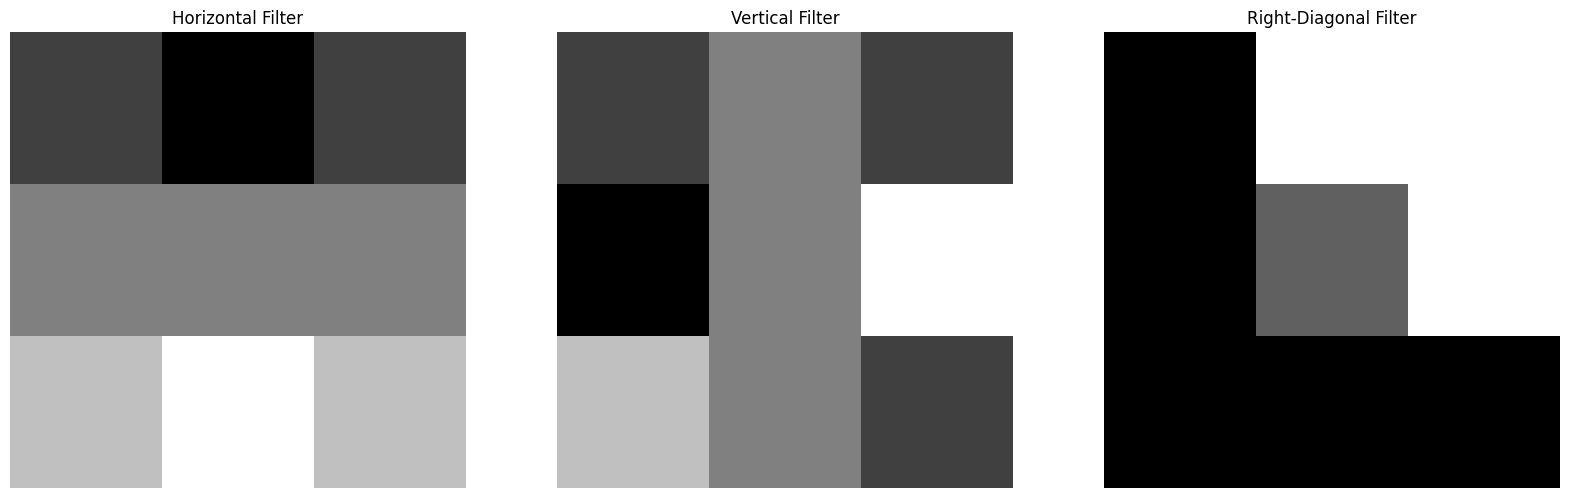

In [5]:
vertical_edge_kernel2D=np.array([[-1,-2,-1],[0,0,0],[1,2,1]]).astype(np.int8)
horizontal_edge_kernel2D=np.array([[-1,0,-1],[-2,0,2],[1,0,-1]]).astype(np.int8)
right_diagonal_edge_kernel2D = np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]).astype(np.int8)

kernel_set2D=[vertical_edge_kernel2D,horizontal_edge_kernel2D,right_diagonal_edge_kernel2D]
title_set=['Horizontal Filter','Vertical Filter','Right-Diagonal Filter']
display_image(kernel_set2D,title_set,row=1,col=3)

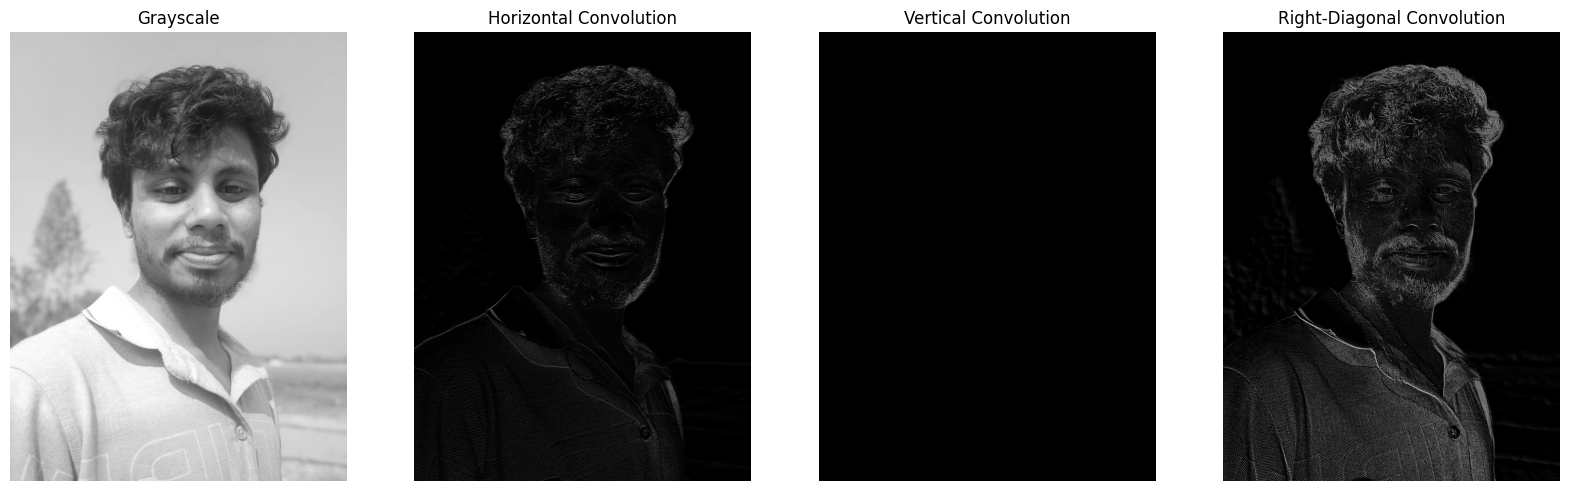

In [6]:
conv_img_set=[gray_img]
n=len(kernel_set2D)
for i in range(n):
    conv_img=cv2.filter2D(gray_img,ddepth=-1,kernel=kernel_set2D[i])
    conv_img_set.append(conv_img)
title_set=['Grayscale','Horizontal Convolution','Vertical Convolution','Right-Diagonal Convolution']
display_image(conv_img_set,title_set,row=1,col=4)

In [7]:
vgg16=VGG16(weights='imagenet',include_top=False)
vgg16.summary()

2024-12-11 22:42:52.828842: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

/home/miju/.local/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 4096, 3072, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


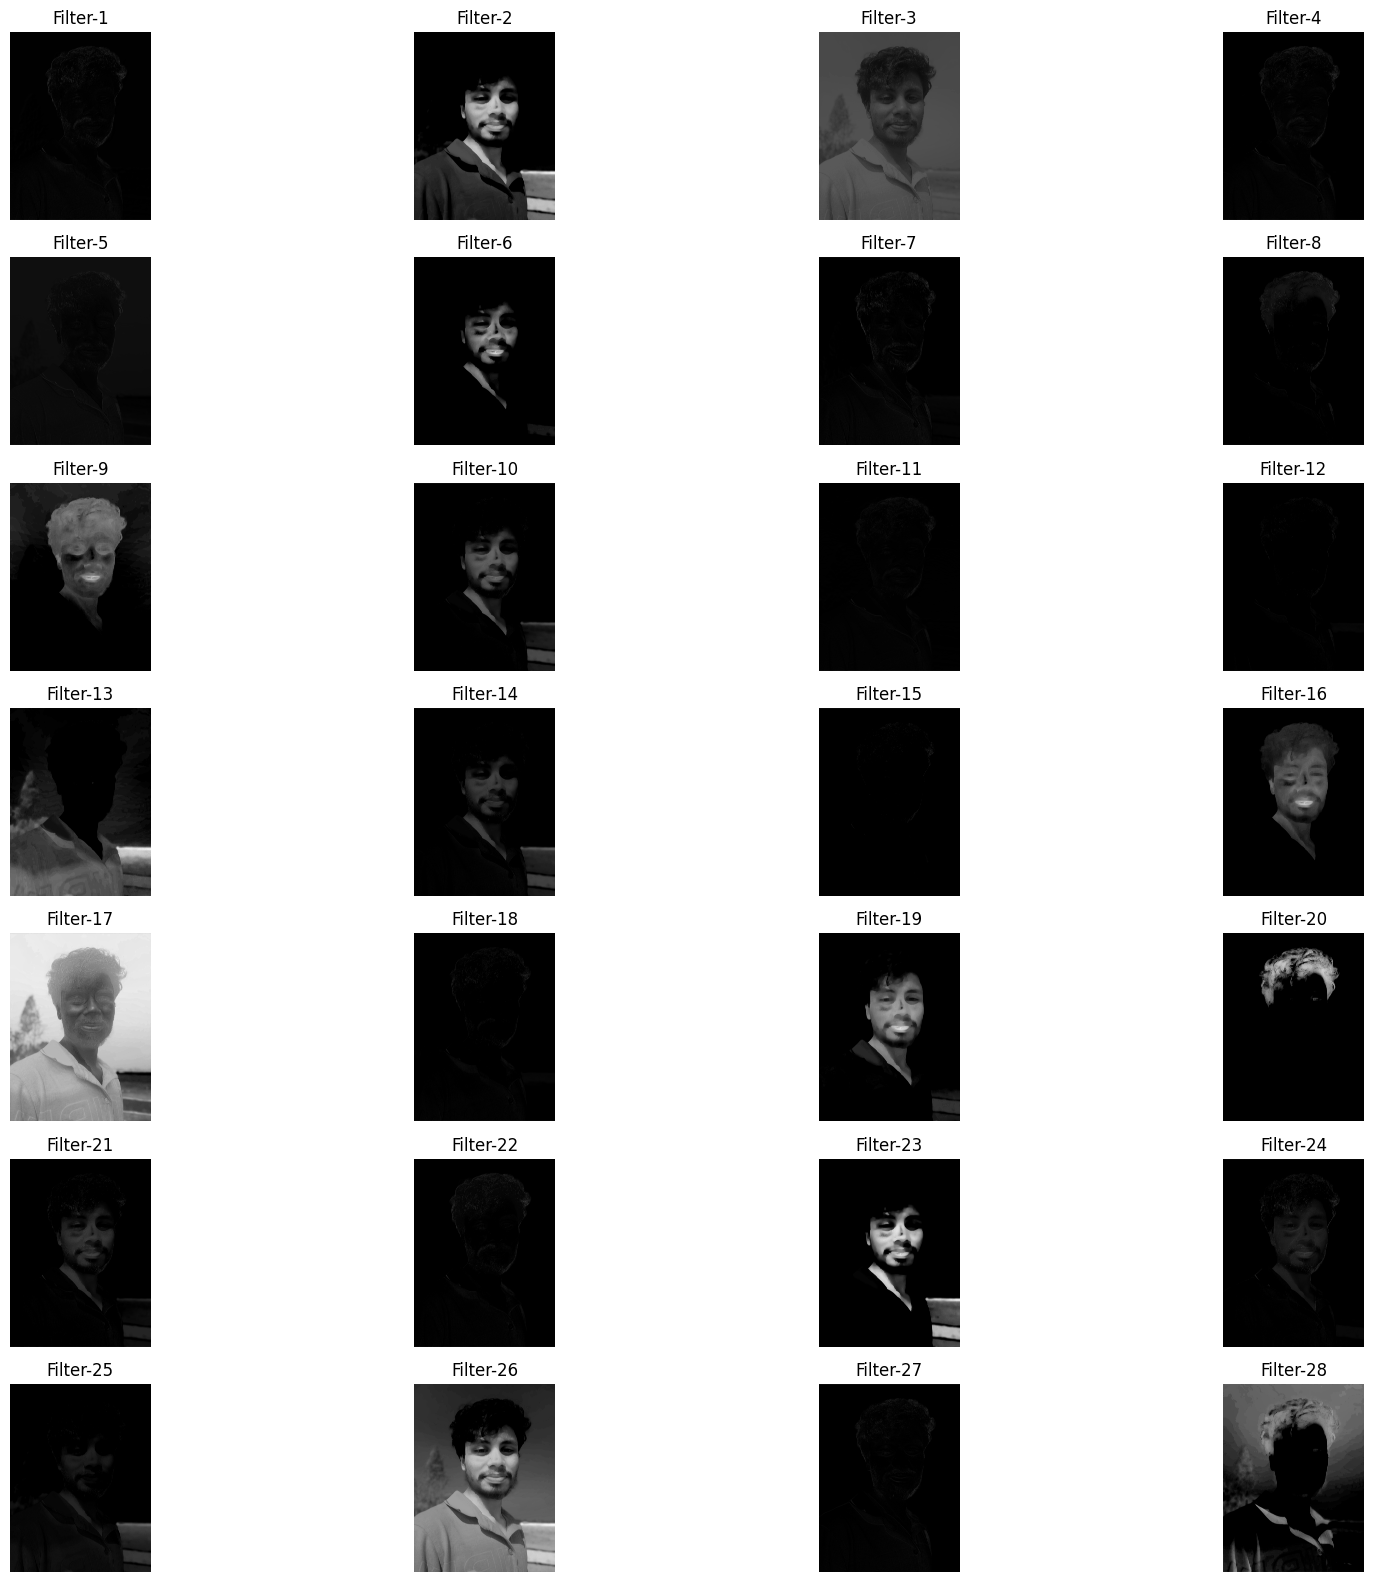

In [8]:
model = Model(vgg16.inputs, vgg16.get_layer('block1_conv1').output)

model.summary()

img3D=np.expand_dims(rgb_img,axis=0)

internal_image=model.predict(img3D)

img_set=[]
title_set=[]
for i in range(28):
    title_set.append('Filter-'+str(i+1))
    img_set.append(internal_image[0, :, :, i])
display_image(img_set,title_set,row=7,col=4)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,160 (1016.25 KB)

 Trainable params: 260,160 (1016.25 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


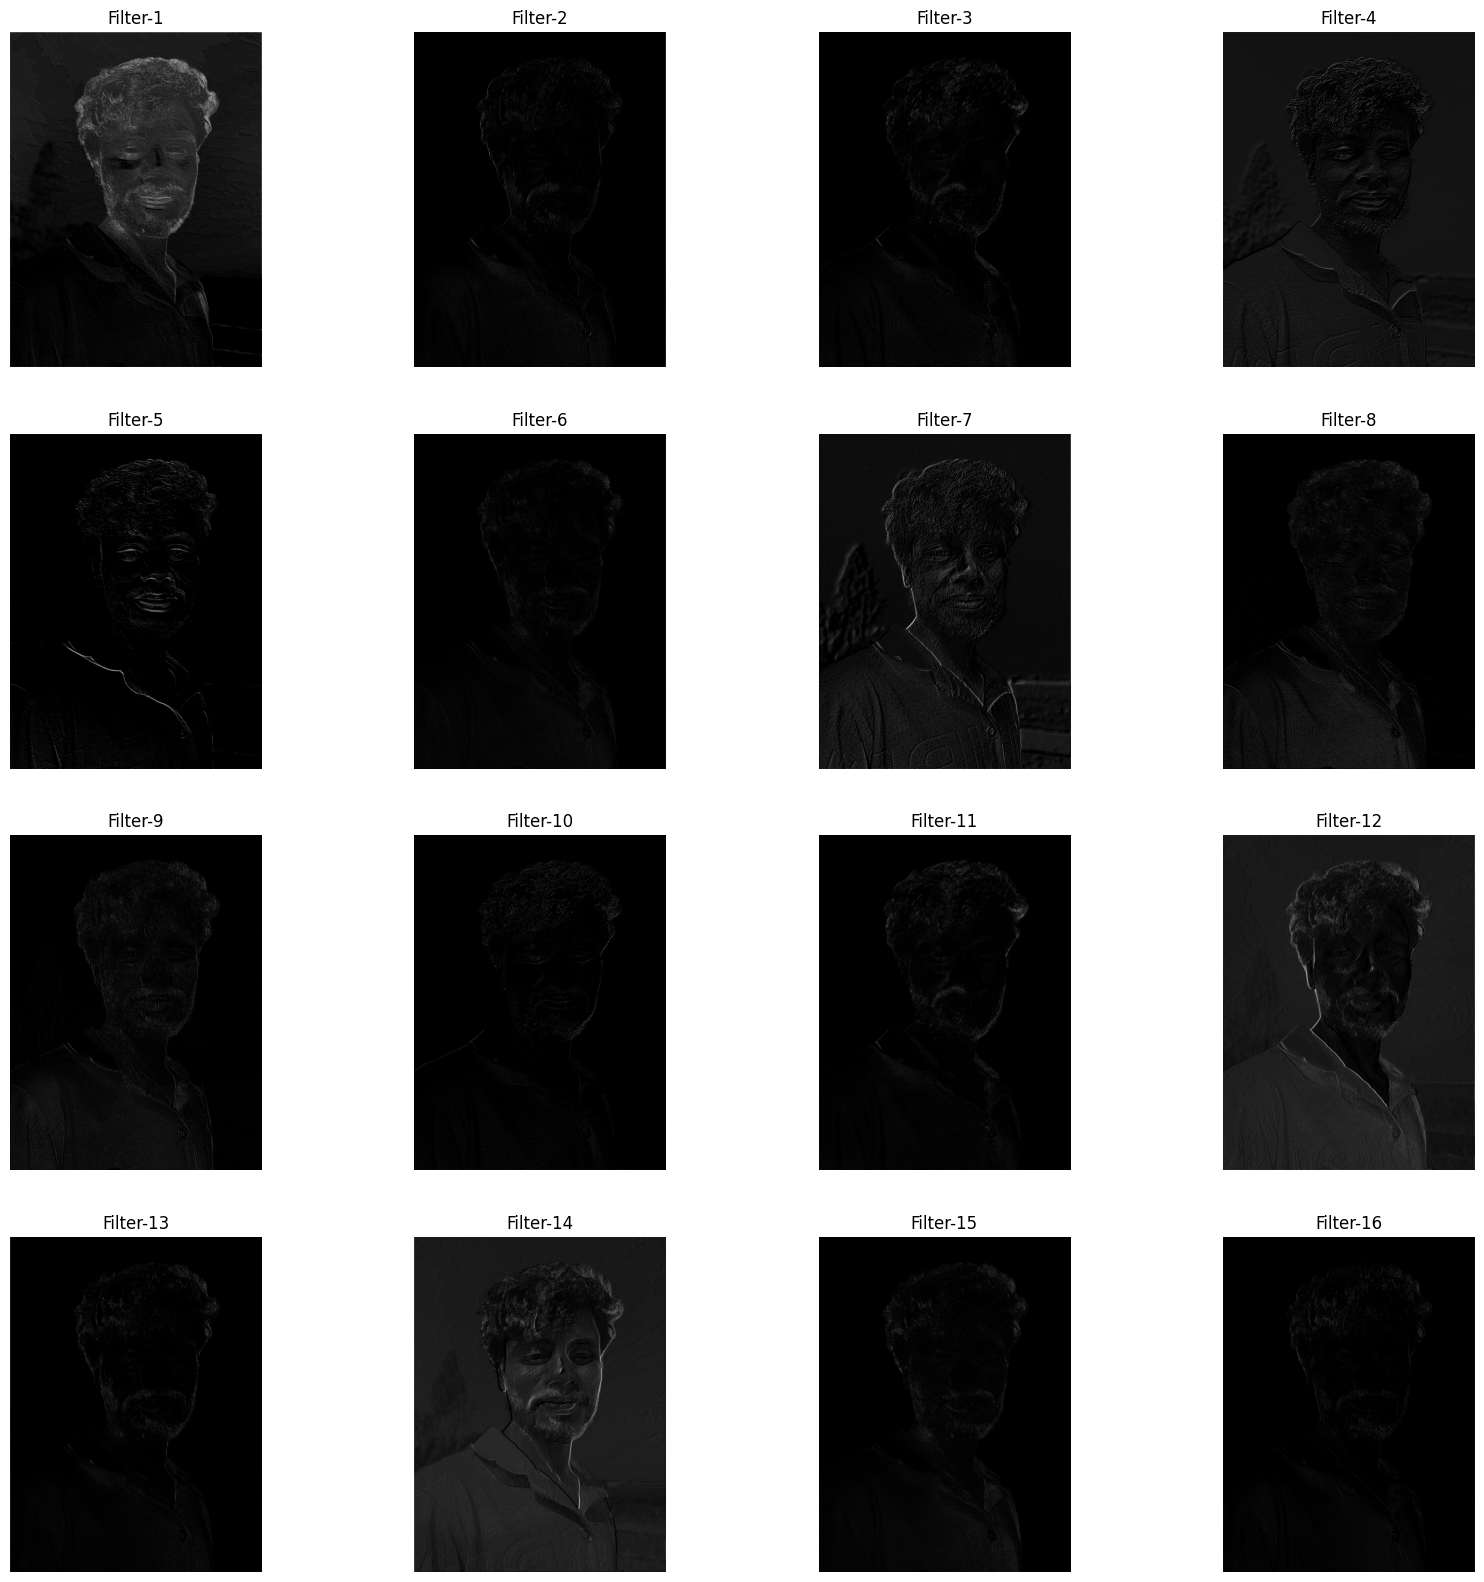

In [9]:
model=Model(vgg16.inputs,vgg16.get_layer('block2_conv2').output)
model.summary()

img3D=np.expand_dims(rgb_img,axis=0)

internal_image=model.predict(img3D)

img_set=[]
title_set=[]

for i in range(16):
    title_set.append('Filter-'+str(i+1))
    img_set.append(internal_image[0, :, :,i])
display_image(img_set,title_set,row=4,col=4)

In [10]:
from tensorflow.keras.layers import Input,Dense,Activation,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Model

In [11]:
inputs=Input((256,256,3))
x=Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(inputs)
x=Flatten()(x)
x=Dense(8,activation='sigmoid')(x)
outputs=Dense(1,name='OutputLayer',activation='sigmoid')(x)
model=Model(inputs,outputs,name='SimpleCNN')
model.summary()

Model: "SimpleCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │     4,194,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,194,929 (16.00 MB)

 Trainable params: 4,194,929 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
inputs=Input((1024,8000,3))
x=Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(inputs)
x=Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(x)
x=MaxPool2D()(x)
x=Conv2D(filters=16,kernel_size=(5,5),activation='relu')(x)
x=Conv2D(filters=32,kernel_size=(7,7),activation='relu')(x)
x=Conv2D(filters=16,kernel_size=(5,5),strides=(2,2),activation='relu')(x)
x=Flatten()(x)
x=Dense(8,activation='relu')(x)
outputs=Dense(20,name='OutputLayer',activation='softmax')(x)
model=Model(inputs,outputs,name='CNN')
model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1024, 8000, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1024, 8000, 8)  │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1024, 8000, 8)  │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 512, 4000, 8)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 508, 3996, 16)  │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 502, 3990, 32)  │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 249, 1993, 16)  │        12,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7940112)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │    63,520,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 20)             │           180 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,564,452 (242.48 MB)

 Trainable params: 63,564,452 (242.48 MB)

 Non-trainable params: 0 (0.00 B)